In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def random_perm(n):
    v = [i for i in range(n)]
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        v[i], v[j] = v[j], v[i]
    return v

In [3]:
def insertion_sort(arr):
    """
    Retorna una tupla con la cantidad de instrucciones, comparaciones y swaps (intercambios)
    """
    ins = 0  # instrucciones
    comp = 0  # comparaciones
    swaps = 0  # swaps (intercambios)
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        ins += 3    # i = ; key =; j = ;
        while j >= 0 and key < arr[j]:
            comp += 1  # key < arr[j];
            arr[j+1] = arr[j]   # Desplaza hacia la derecha el valor
            swaps += 1
            j -= 1
            ins += 3    # arr[j+1] =; j =; j >=;
        arr[j+1] = key; ins += 1
    return ins, comp, swaps

In [4]:
instructions = []   # Lista para manejar las instrucciones
comparisons = []    # Lista para manejar las comparaciones
swaps = []      # Lista para manejar los swaps
max = 51    # Cantidad maxima de permutaciones
runs = 2000   # Cantidad de veces que se ordenaran

In [5]:
for n in range(1, max):
    i_aux = []
    c_aux = []
    s_aux = []
    for _ in range(runs):
        p = random_perm(n)
        #print(p)
        i, c, s = insertion_sort(p)
        #print("i: {}, c: {}, s: {}".format(i, c, s))
        i_aux.append(i)
        c_aux.append(c)
        s_aux.append(s)

    instructions.append(i_aux)
    comparisons.append(c_aux)
    swaps.append(s_aux)

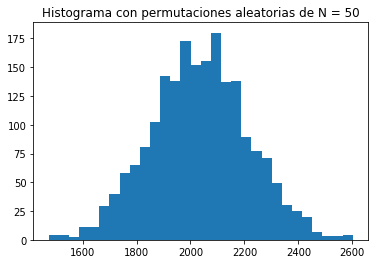

In [6]:
len_i = len(instructions)
arr_hist = instructions[len_i-1]
plt.hist(arr_hist, bins='auto')
title = "Histograma con permutaciones aleatorias de N = " + str(len_i)
plt.title(title)
plt.show()

In [7]:
def means(seq):
    """
    Retorna una lista con las medias de cada lista dentro de la secuencia
    """
    return [np.mean(s) for s in seq]

[0.0, 5.4790000000000001, 12.4595, 20.946000000000002, 30.966999999999999, 43.094000000000001, 55.252499999999998, 69.485500000000002, 86.072000000000003, 103.33499999999999, 122.3605, 142.47499999999999, 165.26249999999999, 188.6695, 213.887, 240.624, 267.36099999999999, 295.85899999999998, 328.947, 360.74200000000002, 394.69999999999999, 432.08850000000001, 466.4425, 507.81200000000001, 545.65350000000001, 588.80499999999995, 630.51199999999994, 672.32100000000003, 720.19600000000003, 770.39300000000003, 818.47950000000003, 871.57899999999995, 919.08950000000004, 976.44600000000003, 1035.2484999999999, 1084.799, 1144.107, 1206.8019999999999, 1255.5725, 1328.1495, 1390.3615, 1455.5150000000001, 1523.9190000000001, 1592.836, 1662.4565, 1733.3040000000001, 1808.0754999999999, 1883.0540000000001, 1958.6400000000001, 2034.2365]
[0.0, 0.49299999999999999, 1.4864999999999999, 2.9820000000000002, 4.9889999999999999, 7.6980000000000004, 10.4175, 13.8285, 18.024000000000001, 22.445, 27.4534999

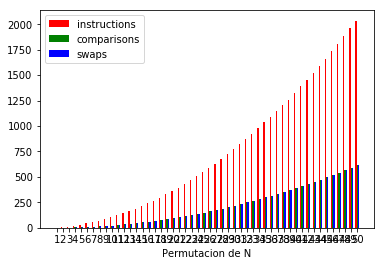

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
x_axe = np.arange(1, max)
w = 0.2     # width

ins_means = means(instructions)
ax.bar(x_axe, ins_means, w, color="r")

comp_means = means(comparisons)
ax.bar(x_axe+w, comp_means, w, color="g")

swaps_means = means(swaps)
ax.bar(x_axe+2*w, swaps_means, w, color="b")

ax.set_xticks(x_axe+w)
ax.set_xticklabels(np.arange(1, max))
ax.legend(["instructions", "comparisons", "swaps"])
ax.set_xlabel("Permutacion de N")

print(ins_means)
print(comp_means)
print(swaps_means)

plt.show()